### Linear Regression

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_diabetes

In [50]:
df=load_diabetes()

In [51]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [52]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)

In [53]:
dataset["Progression"]=df.target

In [54]:
dataset 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [55]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [56]:
###Independent & dependent features

X=dataset.iloc[:,:-1] #independent features
y=dataset.iloc[:,-1] #dependent features

In [57]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

regressor = linear_model.LinearRegression()

mse =cross_val_score(regressor, X, y, cv=5,scoring='neg_mean_squared_error')

In [58]:
np.mean(mse)

-2993.08131046933

### Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
ridge = Ridge()

In [61]:
parameters = {'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [62]:
ridge_regressor = GridSearchCV(ridge,parameters,
                scoring='neg_mean_squared_error',
                cv=5,verbose=10)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=1e-15................................................
[CV 1/5; 1/10] END .............alpha=1e-15;, score=-2779.923 total time=   0.0s
[CV 2/5; 1/10] START alpha=1e-15................................................
[CV 2/5; 1/10] END .............alpha=1e-15;, score=-3028.836 total time=   0.0s
[CV 3/5; 1/10] START alpha=1e-15................................................
[CV 3/5; 1/10] END .............alpha=1e-15;, score=-3237.688 total time=   0.0s
[CV 4/5; 1/10] START alpha=1e-15................................................
[CV 4/5; 1/10] END .............alpha=1e-15;, score=-3008.746 total time=   0.0s
[CV 5/5; 1/10] START alpha=1e-15................................................
[CV 5/5; 1/10] END .............alpha=1e-15;, score=-2910.213 total time=   0.0s
[CV 1/5; 2/10] START alpha=0.001................................................
[CV 1/5; 2/10] END .............alpha=0.001;, sc

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=10)

In [63]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-2993.066154653871


### Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}
lasso_regressor = GridSearchCV(lasso,parameters,
                scoring='neg_mean_squared_error',
                cv=5,verbose=5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................alpha=1e-15;, score=-2779.923 total time=   0.0s
[CV 2/5] END ...................alpha=1e-15;, score=-3028.836 total time=   0.0s
[CV 3/5] END ...................alpha=1e-15;, score=-3237.688 total time=   0.0s
[CV 4/5] END ...................alpha=1e-15;, score=-3008.746 total time=   0.0s
[CV 5/5] END ...................alpha=1e-15;, score=-2910.213 total time=   0.0s
[CV 1/5] END ...................alpha=0.001;, score=-2782.857 total time=   0.0s
[CV 2/5] END ...................alpha=0.001;, score=-3030.005 total time=   0.0s
[CV 3/5] END ...................alpha=0.001;, score=-3231.958 total time=   0.0s
[CV 4/5] END ...................alpha=0.001;, score=-3005.830 total time=   0.0s
[CV 5/5] END ...................alpha=0.001;, score=-2914.999 total time=   0.0s
[CV 1/5] END ....................alpha=0.01;, score=-2799.511 total time=   0.0s
[CV 2/5] END ....................alpha=0.01;, sc

/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

### Elastic Net

In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic_net = ElasticNet()
parameters = {'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}
en_regressor = GridSearchCV(elastic_net,parameters,
                scoring='neg_mean_squared_error',
                cv=5,verbose=1)
en_regressor.fit(X,y)

print(en_regressor.best_params_)
print(en_regressor.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

{'alpha': 1e-15}
-2993.081310714485


/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.320e+05, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(


Train test split

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [67]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_en = en_regressor.predict(X_test)

/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


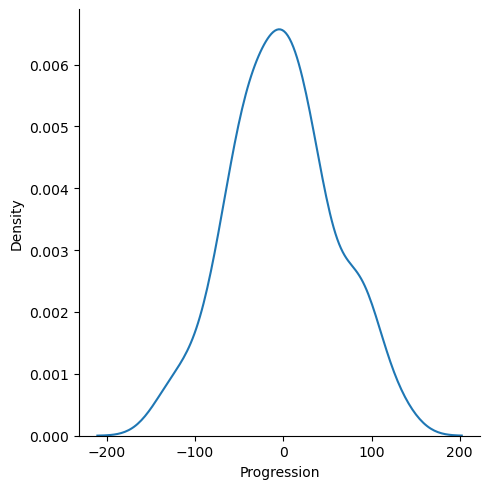

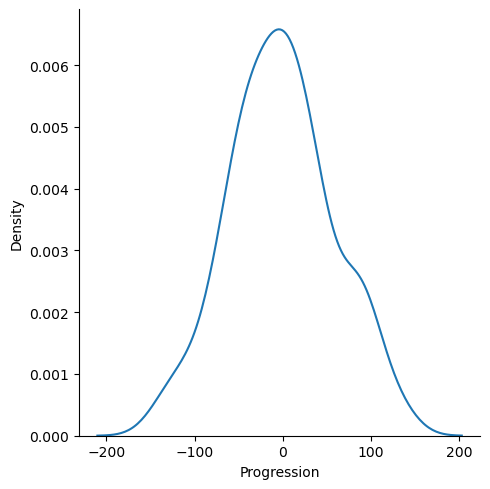

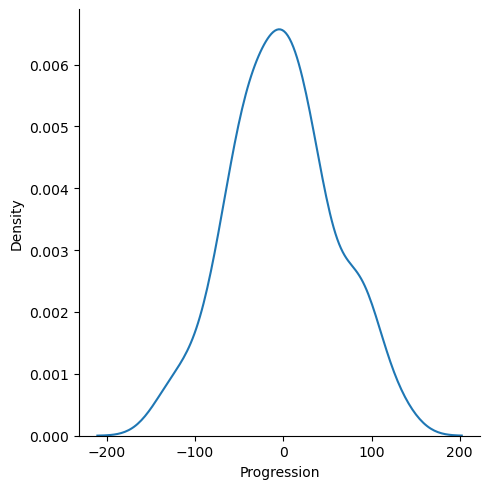

In [68]:
import seaborn as sns 

sns.displot(y_test-prediction_lasso,kind='kde')
sns.displot(y_test-prediction_ridge,kind='kde')
sns.displot(y_test-prediction_en,kind='kde')

In [69]:
from sklearn.metrics import r2_score

print (r2_score(y_test,prediction_lasso))
print (r2_score(y_test,prediction_en))
print (r2_score(y_test,prediction_ridge))

0.4708317001211636
0.47083170012135267
0.4715780233677477


##### svm (Classification)

In [70]:
import seaborn as sns
import numpy as np
import pandas as pd

In [71]:
df = sns.load_dataset('iris')

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
df = df[df['species']!='setosa']

In [74]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [75]:
df['species']  = df['species'].map({
    'virginica':1,
    "versicolor":0
})

In [76]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [77]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.5,1,2,3,4,5,6,7,9], 'penalty': ['l1', 'l2', 'elasticnet']}
log_regressor = GridSearchCV(regression, param_grid,
                             scoring='accuracy', cv=5
                             )
log_regressor.fit(X, y)

/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harishankarvs/anaconda3/lib/python3.11/site-packages

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 9],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [82]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [83]:
print (log_regressor.best_score_)

0.96


In [84]:
pred_log = log_regressor.predict(X_test)

In [85]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


/Users/harishankarvs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


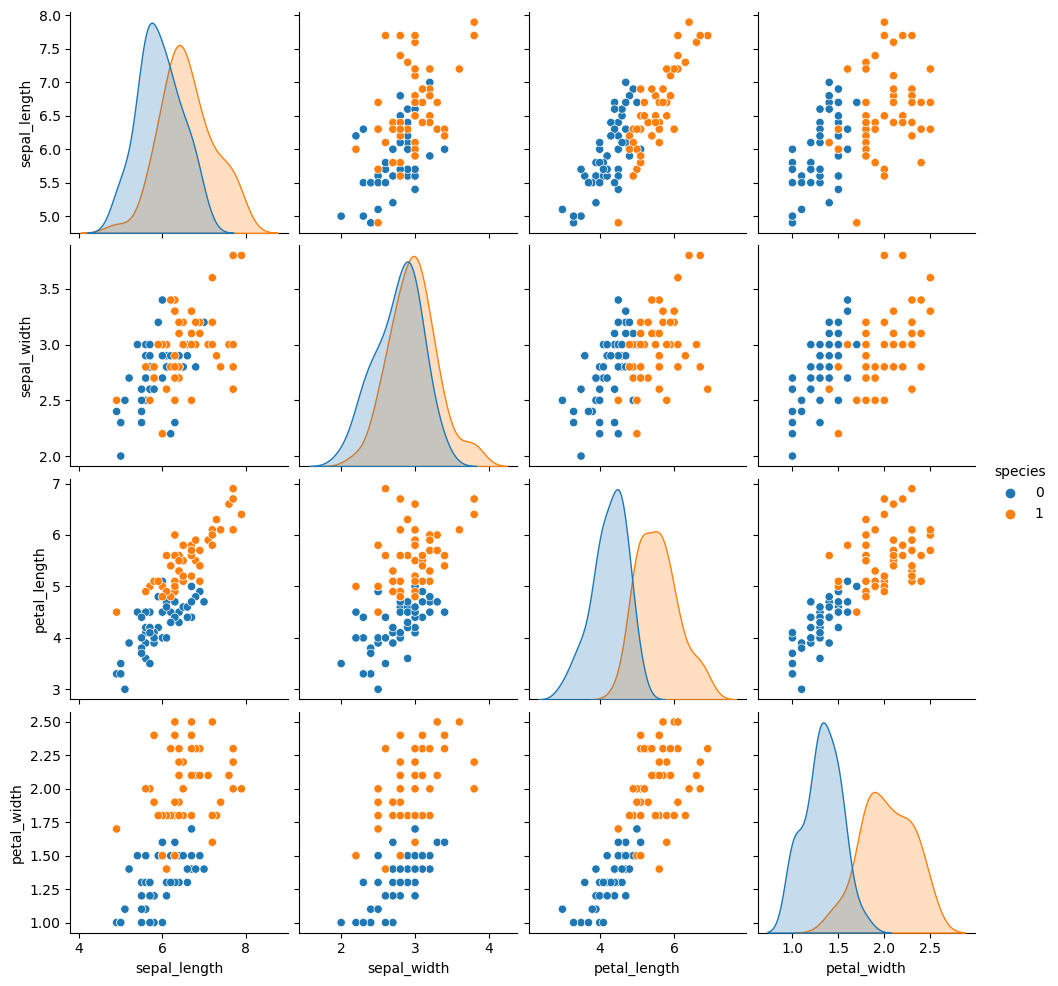

In [86]:
sns.pairplot(df, hue='species')

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score
confusion_matrix(y_test, pred_log)

array([[11,  1],
       [ 0,  8]])

In [88]:
f1_score(y_test, pred_log)

0.9411764705882353

**Decision Tree**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
import seaborn as sns

In [109]:
df= sns.load_dataset('iris')

In [112]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
df['species']  = df['species'].map({
    'setosa':0,
    'virginica':2,
    "versicolor":1
})

**Post pruning**

In [121]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="gini", max_depth=3)
classifier.fit(df.iloc[:, :-1], df.iloc[:, -1])

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

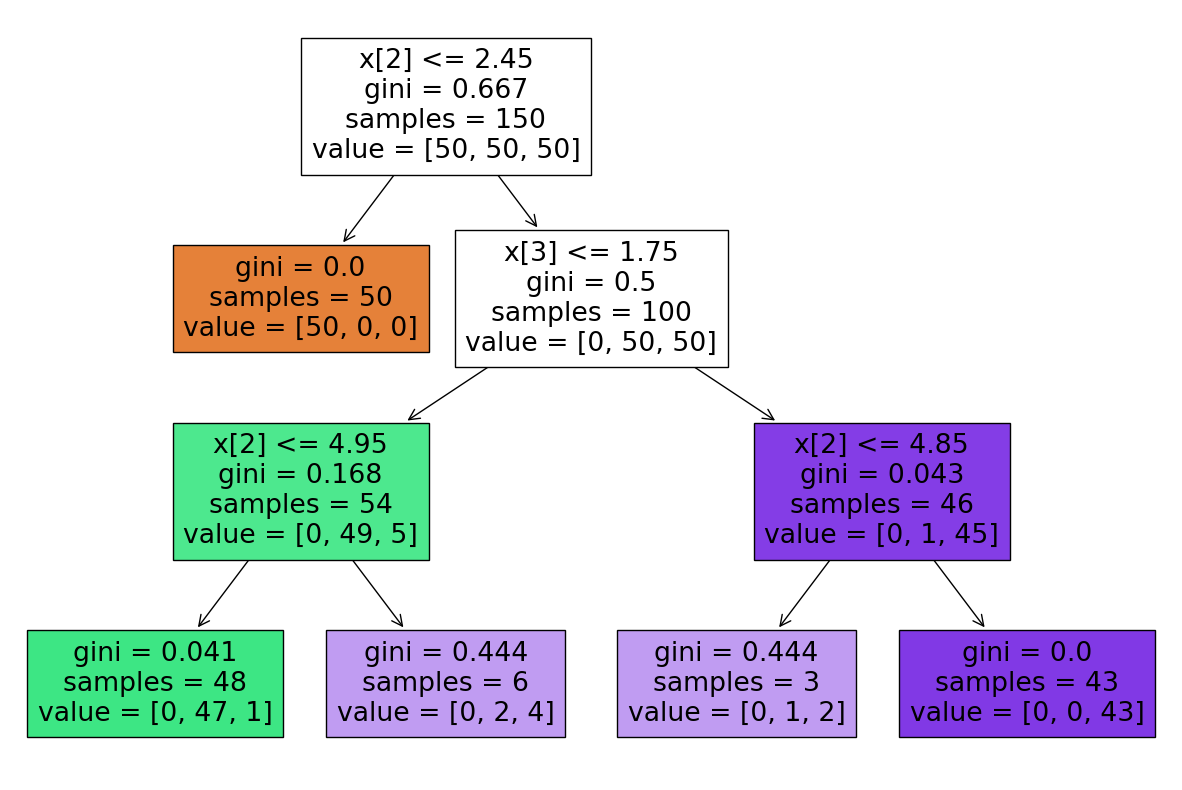

In [122]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, filled=True)

**Pre pruning**

In [123]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "criterion":['gini', 'entropy'],
    'splitter':["best", "random"],
    "max_depth":range(2,7,1),
    "min_samples_leaf":range(1,15,1),
    'min_samples_split':range(2,15,1)
}
grid_search = GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
grid_search.fit(df.iloc[:, :-1], df.iloc[:, -1])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [124]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


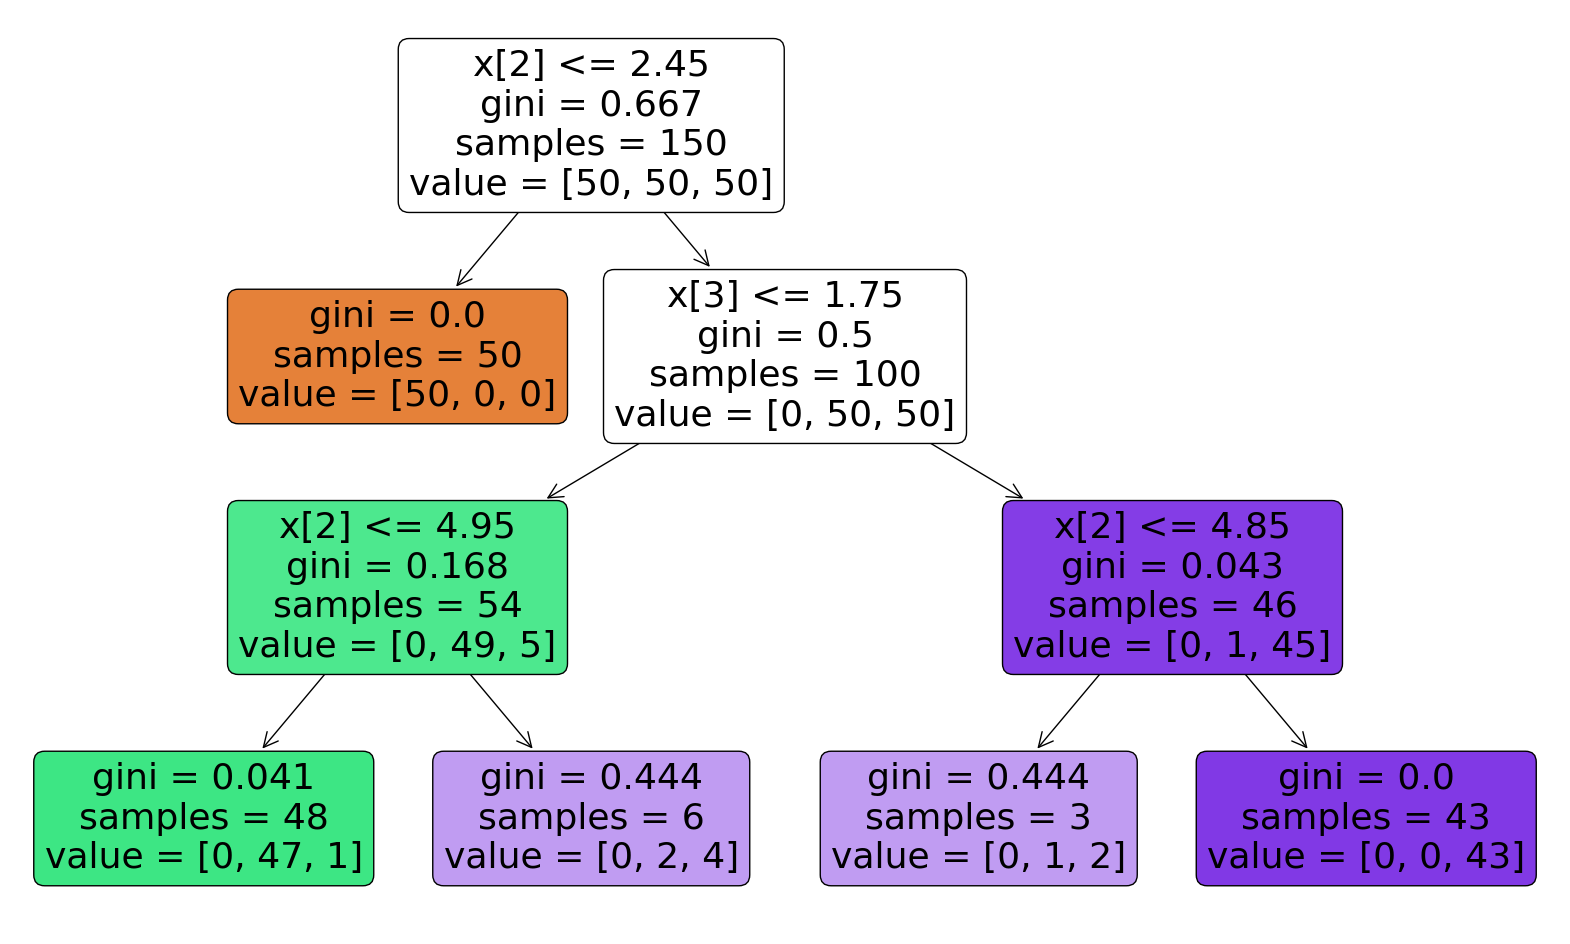

In [126]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter='best')
clf.fit(df.iloc[:, :-1], df.iloc[:, -1])
plt.figure(figsize=(20,12))
tree.plot_tree(clf, rounded=True, filled=True)
plt.show()

In [128]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(df.iloc[:, :-1])
accuracy_score(df.iloc[:,-1], y_pred)

0.9733333333333334